> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Data Selected TMDB_MOVIES. 

> Question 1: What is the profit (Adj Rev- Adj Budget) for top 10 director with most popularity. 

> Question 2: Does release year affect popularity? 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df=pd.read_csv('tmdb-movies.csv',index_col=0)
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
sum(df.duplicated())

1

In [5]:
df.drop_duplicates(inplace=True)


In [6]:
sum(df.duplicated())

0

In [7]:
#modify release date
a=pd.to_datetime(df['release_date'], format='%m/%d/%y')
df['montha']=pd.DatetimeIndex(a).month
df['daya']=pd.DatetimeIndex(a).day
df['release_date_corra'] = df['release_year'].astype(str)+'-'+df['montha'].astype(str)+'-'+df['daya'].astype(str)
df['release_date_corra']=pd.to_datetime(df['release_date_corra'])

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [9]:
#create df that budget and revenue both >0
df_BR=df[(df['budget_adj']>0) & (df['revenue_adj']>0)]

In [10]:
df_BR = pd.DataFrame(data=df_BR)

In [11]:
df_BR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 135397 to 2161
Data columns (total 23 columns):
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3850 non-null object
homepage                1426 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-nu

In [12]:
df_BR.drop(['homepage', 'cast', 'tagline', 'overview','runtime','genres','production_companies'],axis=1, inplace=True)
#create director dataset with popularity','budget_adj','revenue_adj','director' 
df_brdirector=df_BR.filter(['popularity','budget_adj','revenue_adj','director'], axis=1)
df_brdirector.dropna(inplace=True)

df_brdirector['R_B']=df_brdirector['revenue_adj']-df_brdirector['budget_adj']
df_brdirector

,popularity,budget_adj,revenue_adj,director,R_B
id,,,,,
135397,32.985763,1.379999e+08,1.392446e+09,Colin Trevorrow,1.254446e+09
76341,28.419936,1.379999e+08,3.481613e+08,George Miller,2.101614e+08
262500,13.112507,1.012000e+08,2.716190e+08,Robert Schwentke,1.704191e+08
140607,11.173104,1.839999e+08,1.902723e+09,J.J. Abrams,1.718723e+09
168259,9.335014,1.747999e+08,1.385749e+09,James Wan,1.210949e+09
281957,9.110700,1.241999e+08,4.903142e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,3.661143e+08
87101,8.654359,1.425999e+08,4.053551e+08,Alan Taylor,2.627551e+08
286217,7.667400,9.935996e+07,5.477497e+08,Ridley Scott,4.483897e+08
211672,7.404165,6.807997e+07,1.064192e+09,Kyle Balda|Pierre Coffin,9.961120e+08


In [13]:
#rename colmuns in df_combined1
aaaaa=df_brdirector.director.str.split('|',expand=True)

df_combined1 = pd.merge(df_brdirector, aaaaa, how='inner',left_index=True, right_index=True)

new_names=[
'director1',
'director2',
'director3',
'director4',
'director5',
'director6',
'director7',
'director8',
'director9',
'director10',
'director11','director12']

column_indices = list(range(5,17))
column_indices
old_names =df_combined1.columns[column_indices]
df_combined1.rename(columns=dict(zip(old_names, new_names)), inplace=True)

df_combined1



,popularity,budget_adj,revenue_adj,director,R_B,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12
id,,,,,,,,,,,,,,,,,
135397,32.985763,1.379999e+08,1.392446e+09,Colin Trevorrow,1.254446e+09,Colin Trevorrow,None,None,None,None,None,None,None,None,None,None,None
76341,28.419936,1.379999e+08,3.481613e+08,George Miller,2.101614e+08,George Miller,None,None,None,None,None,None,None,None,None,None,None
262500,13.112507,1.012000e+08,2.716190e+08,Robert Schwentke,1.704191e+08,Robert Schwentke,None,None,None,None,None,None,None,None,None,None,None
140607,11.173104,1.839999e+08,1.902723e+09,J.J. Abrams,1.718723e+09,J.J. Abrams,None,None,None,None,None,None,None,None,None,None,None
168259,9.335014,1.747999e+08,1.385749e+09,James Wan,1.210949e+09,James Wan,None,None,None,None,None,None,None,None,None,None,None
281957,9.110700,1.241999e+08,4.903142e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,3.661143e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,None,None,None,None,None,None,None,None,None,None,None
87101,8.654359,1.425999e+08,4.053551e+08,Alan Taylor,2.627551e+08,Alan Taylor,None,None,None,None,None,None,None,None,None,None,None
286217,7.667400,9.935996e+07,5.477497e+08,Ridley Scott,4.483897e+08,Ridley Scott,None,None,None,None,None,None,None,None,None,None,None
211672,7.404165,6.807997e+07,1.064192e+09,Kyle Balda|Pierre Coffin,9.961120e+08,Kyle Balda,Pierre Coffin,None,None,None,None,None,None,None,None,None,None


In [14]:
df_combined1.head()

,popularity,budget_adj,revenue_adj,director,R_B,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12
id,,,,,,,,,,,,,,,,,
135397,32.985763,1.379999e+08,1.392446e+09,Colin Trevorrow,1.254446e+09,Colin Trevorrow,None,None,None,None,None,None,None,None,None,None,None
76341,28.419936,1.379999e+08,3.481613e+08,George Miller,2.101614e+08,George Miller,None,None,None,None,None,None,None,None,None,None,None
262500,13.112507,1.012000e+08,2.716190e+08,Robert Schwentke,1.704191e+08,Robert Schwentke,None,None,None,None,None,None,None,None,None,None,None
140607,11.173104,1.839999e+08,1.902723e+09,J.J. Abrams,1.718723e+09,J.J. Abrams,None,None,None,None,None,None,None,None,None,None,None
168259,9.335014,1.747999e+08,1.385749e+09,James Wan,1.210949e+09,James Wan,None,None,None,None,None,None,None,None,None,None,None


In [15]:
df_combined11=pd.merge(df_brdirector, df_combined1['director1'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined12=pd.merge(df_brdirector, df_combined1['director2'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined13=pd.merge(df_brdirector, df_combined1['director3'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined14=pd.merge(df_brdirector, df_combined1['director4'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined15=pd.merge(df_brdirector, df_combined1['director5'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined16=pd.merge(df_brdirector, df_combined1['director6'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined17=pd.merge(df_brdirector, df_combined1['director7'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined18=pd.merge(df_brdirector, df_combined1['director8'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined19=pd.merge(df_brdirector, df_combined1['director9'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined110=pd.merge(df_brdirector, df_combined1['director10'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined111=pd.merge(df_brdirector, df_combined1['director11'].to_frame(), how='inner',left_index=True, right_index=True)
df_combined112=pd.merge(df_brdirector, df_combined1['director12'].to_frame(), how='inner',left_index=True, right_index=True)

In [16]:
df_combined11.drop(['director'],axis=1, inplace=True)
df_combined12.drop(['director'],axis=1, inplace=True)
df_combined13.drop(['director'],axis=1, inplace=True)
df_combined14.drop(['director'],axis=1, inplace=True)
df_combined15.drop(['director'],axis=1, inplace=True)
df_combined16.drop(['director'],axis=1, inplace=True)
df_combined17.drop(['director'],axis=1, inplace=True)
df_combined18.drop(['director'],axis=1, inplace=True)
df_combined19.drop(['director'],axis=1, inplace=True)
df_combined110.drop(['director'],axis=1, inplace=True)
df_combined111.drop(['director'],axis=1, inplace=True)
df_combined112.drop(['director'],axis=1, inplace=True)



In [17]:
df_combined11.rename(columns={"director1": "director"},inplace=True)
df_combined12.rename(columns={"director2": "director"},inplace=True)
df_combined13.rename(columns={"director3": "director"},inplace=True)
df_combined14.rename(columns={"director4": "director"},inplace=True)
df_combined15.rename(columns={"director5": "director"},inplace=True)
df_combined16.rename(columns={"director6": "director"},inplace=True)
df_combined17.rename(columns={"director7": "director"},inplace=True)
df_combined18.rename(columns={"director8": "director"},inplace=True)
df_combined19.rename(columns={"director9": "director"},inplace=True)
df_combined110.rename(columns={"director10": "director"},inplace=True)
df_combined111.rename(columns={"director11": "director"},inplace=True)
df_combined112.rename(columns={"director12": "director"},inplace=True)


In [18]:
df_combined2=df_combined11.append(df_combined12).append(df_combined13).append(df_combined14).append(df_combined15).append(df_combined16).append(df_combined17).append(df_combined18).append(df_combined19).append(df_combined110).append(df_combined111).append(df_combined112)
df_combined2

,popularity,budget_adj,revenue_adj,R_B,director
id,,,,,
135397,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Colin Trevorrow
76341,28.419936,1.379999e+08,3.481613e+08,2.101614e+08,George Miller
262500,13.112507,1.012000e+08,2.716190e+08,1.704191e+08,Robert Schwentke
140607,11.173104,1.839999e+08,1.902723e+09,1.718723e+09,J.J. Abrams
168259,9.335014,1.747999e+08,1.385749e+09,1.210949e+09,James Wan
281957,9.110700,1.241999e+08,4.903142e+08,3.661143e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
87101,8.654359,1.425999e+08,4.053551e+08,2.627551e+08,Alan Taylor
286217,7.667400,9.935996e+07,5.477497e+08,4.483897e+08,Ridley Scott
211672,7.404165,6.807997e+07,1.064192e+09,9.961120e+08,Kyle Balda


In [19]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46236 entries, 135397 to 2161
Data columns (total 5 columns):
popularity     46236 non-null float64
budget_adj     46236 non-null float64
revenue_adj    46236 non-null float64
R_B            46236 non-null float64
director       4164 non-null object
dtypes: float64(4), object(1)
memory usage: 2.1+ MB


In [20]:
#combined data with all directors, assumption: treat first, second director as independent.
df_combined2.dropna()

,popularity,budget_adj,revenue_adj,R_B,director
id,,,,,
135397,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Colin Trevorrow
76341,28.419936,1.379999e+08,3.481613e+08,2.101614e+08,George Miller
262500,13.112507,1.012000e+08,2.716190e+08,1.704191e+08,Robert Schwentke
140607,11.173104,1.839999e+08,1.902723e+09,1.718723e+09,J.J. Abrams
168259,9.335014,1.747999e+08,1.385749e+09,1.210949e+09,James Wan
281957,9.110700,1.241999e+08,4.903142e+08,3.661143e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
87101,8.654359,1.425999e+08,4.053551e+08,2.627551e+08,Alan Taylor
286217,7.667400,9.935996e+07,5.477497e+08,4.483897e+08,Ridley Scott
211672,7.404165,6.807997e+07,1.064192e+09,9.961120e+08,Kyle Balda


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What is the profit (Adj Rev- Adj Budget) for top 10 director with most popularity. 

Some movies have more than one directors and it is splitted and treated seperately. e.g. if one movie has 2 direcotrs, it will be two rows with individual diretor on each row. Mean (Adj Rev) - mean(Adj Budget) is used to calculate profitability. 

In [21]:
df_popularityranka=df_combined2.groupby('director',as_index=True).mean()

In [22]:
df_popularityranka['R_B']=df_popularityranka['revenue_adj']-df_popularityranka['budget_adj']

In [23]:
df_1= df_popularityranka.sort_values(by='popularity',ascending=False).iloc[:10,:]

In [24]:
df_1

,popularity,budget_adj,revenue_adj,R_B
director,,,,
Colin Trevorrow,16.696886,6.935612e+07,6.981261e+08,6.287700e+08
Chad Stahelski,11.422751,1.842182e+07,7.252661e+07,5.410479e+07
David Leitch,11.422751,1.842182e+07,7.252661e+07,5.410479e+07
Morten Tyldum,8.110711,1.289527e+07,2.151261e+08,2.022308e+08
Christopher Nolan,7.695094,1.268367e+08,5.205327e+08,3.936960e+08
Alan Taylor,6.883129,1.508628e+08,4.272156e+08,2.763528e+08
Anthony Russo,6.875857,1.074978e+08,3.997243e+08,2.922265e+08
Joe Russo,6.875857,1.074978e+08,3.997243e+08,2.922265e+08
Alex Garland,6.118847,1.379999e+07,3.391985e+07,2.011985e+07


In [25]:
df_2top10=df_1.filter(['popularity','R_B'], axis=1)

In [26]:
df_2top10

,popularity,R_B
director,,
Colin Trevorrow,16.696886,6.287700e+08
Chad Stahelski,11.422751,5.410479e+07
David Leitch,11.422751,5.410479e+07
Morten Tyldum,8.110711,2.022308e+08
Christopher Nolan,7.695094,3.936960e+08
Alan Taylor,6.883129,2.763528e+08
Anthony Russo,6.875857,2.922265e+08
Joe Russo,6.875857,2.922265e+08
Alex Garland,6.118847,2.011985e+07


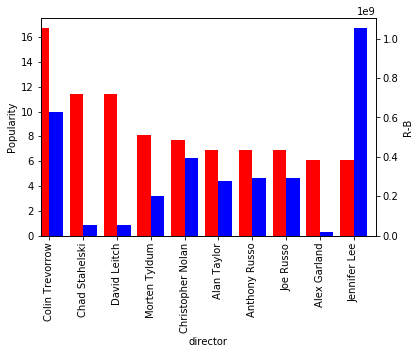

In [27]:
## the plot shows the average adjusted Revenue-adjusted Budget for the top 10 highest average popularity directors. 

fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width=0.4
df_2top10.popularity.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_2top10.R_B.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Popularity')
ax2.set_ylabel('R-B')

plt.show()

The top 10 directors with most popularity are as above. Red bars represent popularity and blue bars represent "profit" (Adj Rev- Adj Budget). For a director with most popularity, it is assumed that they make the most profit. However, it is not the case for the top 10 directors. Below code shows how many movies are selected for comparison.

In [28]:
index1=df_2top10.index
##return all movies for top 10 popularity directors
listtop10=df_combined2[df_combined2['director'].isin(index1)]
##get count of how many movie the diretor has on the list 

df_2top10['MovieCountsinlist']=listtop10.groupby('director',as_index=True)['R_B'].count()
df_2top10

,popularity,R_B,MovieCountsinlist
director,,,
Colin Trevorrow,16.696886,6.287700e+08,2
Chad Stahelski,11.422751,5.410479e+07,1
David Leitch,11.422751,5.410479e+07,1
Morten Tyldum,8.110711,2.022308e+08,1
Christopher Nolan,7.695094,3.936960e+08,8
Alan Taylor,6.883129,2.763528e+08,2
Anthony Russo,6.875857,2.922265e+08,2
Joe Russo,6.875857,2.922265e+08,2
Alex Garland,6.118847,2.011985e+07,1


Code below shows detail information of movie selected. Movies with highest popularity are released after 2002. 

In [29]:

index1=df_2top10.index
##return all movies for top 10 popularity directors
list1=df_BR[df_BR['director'].isin(index1)]
##get count of how many movie the diretor has on the list 

list1

,imdb_id,popularity,budget,revenue,original_title,director,keywords,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,montha,daya,release_date_corra
id,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,2015-06-09
87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,saving the world|artificial intelligence|cybor...,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,6,23,2015-06-23
264660,tt0470752,6.118847,15000000,36869414,Ex Machina,Alex Garland,dancing|artificial intelligence|helicopter|dis...,1/21/15,2854,7.6,2015,1.379999e+07,3.391985e+07,1,21,2015-01-21
157336,tt0816692,24.949134,165000000,621752480,Interstellar,Christopher Nolan,saving the world|artificial intelligence|fathe...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,11,5,2014-11-05
205596,tt2084970,8.110711,14000000,233555708,The Imitation Game,Morten Tyldum,gay|england|world war ii|mathematician|biography,11/14/14,3478,8.0,2014,1.289527e+07,2.151261e+08,11,14,2014-11-14
27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,loss of lover|dream|sleep|subconsciousness|heist,7/14/10,9767,7.9,2010,1.600000e+08,8.255000e+08,7,14,2010-07-14
155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christopher Nolan,dc comics|crime fighter|secret identity|scarec...,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09,7,16,2008-07-16
320,tt0278504,1.111488,46000000,113714830,Insomnia,Christopher Nolan,detective|confession|fbi|homicide|blackmail,5/24/02,564,6.6,2002,5.576402e+07,1.378521e+08,5,24,2002-05-24
49026,tt1345836,6.591277,250000000,1081041287,The Dark Knight Rises,Christopher Nolan,dc comics|crime fighter|terrorist|secret ident...,7/16/12,6723,7.5,2012,2.374361e+08,1.026713e+09,7,16,2012-07-16


### Research Question 2  : Derived from the first question, does year affect popularity? 

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df_yearpop=df_BR.filter(['release_year','popularity','original_title','imdb_id'], axis=1)
df_yearpop.dropna(inplace=True)
df_yearpop

,release_year,popularity,original_title,imdb_id
id,,,,
135397,2015,32.985763,Jurassic World,tt0369610
76341,2015,28.419936,Mad Max: Fury Road,tt1392190
262500,2015,13.112507,Insurgent,tt2908446
140607,2015,11.173104,Star Wars: The Force Awakens,tt2488496
168259,2015,9.335014,Furious 7,tt2820852
281957,2015,9.110700,The Revenant,tt1663202
87101,2015,8.654359,Terminator Genisys,tt1340138
286217,2015,7.667400,The Martian,tt3659388
211672,2015,7.404165,Minions,tt2293640


Text(0,0.5,'Popularity')

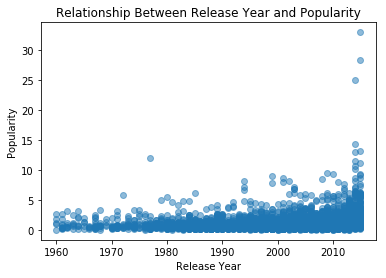

In [34]:
plt.scatter(df_yearpop.release_year, df_yearpop.popularity,alpha=0.5)
plt.title('Relationship Between Release Year and Popularity')
plt.xlabel('Release Year')
plt.ylabel('Popularity')

In [35]:
df_yearpop.corr()

,release_year,popularity
release_year,1.000000,0.173278
popularity,0.173278,1.000000


In [36]:
from scipy.stats import pearsonr
pearsonr(df_yearpop.release_year, df_yearpop.popularity)

(0.17327751263187383, 2.3306560333718184e-27)

The graph showed a moderate corrlation between release year and popularity. The later correlation calculation confirmed 0.1733 correlation with 2.33e-27 significance. Thus, we can conclude release year moderately affect popularity. 

<a id='conclusions'></a>
## Conclusions

Q1: For the top 10 popular directors, popularity does not necessarily drive to profitable. 

limitation: some director only have one movie but have high popularity. It can not represent average case. 

Q2: Popularity is affected by year released. This probably can be explained that theatre are more available and people go to theatre more often after year 2000. 

limitation: More variable can be considered. Although correlation cannot be explained as causation, in this case, the manipulation is purely year and the dependent variable is popularity. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0